# Introduction
The first half runs TensorFlow's Example. In the latter half, we will write the code for Keras.

# Problem 1
Sharing and executing the official tutorial model

### NOTE
- Since it's computationally expensive, i've moved it to another notebook named problem1.ipynb in the same folder
- Relative Link: [./problem2.ipynb](./problem1.ipynb)
- Github: [Link](https://github.com/produdez/diveintocode-ml/blob/main/Week%2020/problem1.ipynb)

# Problem 2
(Advance assignment) Execute various methods

### NOTE
- Since it's computationally expensive, i've moved it to another notebook named problem2.ipynb in the same folder
- Relative Link: [./problem2.ipynb](./problem2.ipynb)
- Github: [Link](https://github.com/produdez/diveintocode-ml/blob/main/Week%2020/problem2.ipynb)

# Problem 3
Learning Iris (binary classification) with Keras

## Prep

In [253]:
# load data
from sklearn.datasets import load_iris

iris_bunch = load_iris(as_frame = True)
print('features', iris_bunch.feature_names)
print('targets', iris_bunch.target_names)

features ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
targets ['setosa' 'versicolor' 'virginica']


In [254]:
# check features
features_data = iris_bunch.data
print(features_data.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [255]:
# check target
target_data = iris_bunch.target
print('labels: ', target_data.unique())
print(target_data.head())

labels:  [0 1 2]
0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64


In [256]:
# binary classification filter
first_two_laybel_indexes =  target_data.lt(2)
binary_x = features_data[first_two_laybel_indexes]
binary_y = target_data[first_two_laybel_indexes]

print('Before shape: ', features_data.shape, target_data.shape)
print('After shape: ', binary_x.shape, binary_y.shape)

Before shape:  (150, 4) (150,)
After shape:  (100, 4) (100,)


In [257]:
# standardization
from sklearn.preprocessing import StandardScaler
import pandas as pd
scaler = StandardScaler()
processed_bin_x = scaler.fit_transform(binary_x.to_numpy())
# print('before trans')
# print(binary_x.describe())
# print('after scale')
# print(pd.DataFrame(processed_bin_x).describe())

# onehot encode
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
binary_y = binary_y.to_numpy().reshape(-1,1)
processed_bin_y = enc.fit_transform(binary_y).toarray()
# print('before trans')
# print(pd.DataFrame(binary_y).describe())
# print('after scale')
# print(pd.DataFrame(processed_bin_y).describe())

In [258]:
# train test split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train,y_test = train_test_split(processed_bin_x, processed_bin_y)
print([x.shape for x in [x_train, x_test, y_train,y_test]])

[(75, 4), (25, 4), (75, 2), (25, 2)]


## Model

In [259]:
import tensorflow as tf
import tensorflow.keras as keras

In [260]:
# model
model = keras.Sequential()

# layers
from tensorflow.keras import layers

model.add(layers.Dense(20, activation="relu", name="layer1"))
model.add(layers.Dense(10, activation="relu", name="layer2"))
model.add(layers.Dense(2, name="layer3"))


model.layers

In [261]:
model.build(x_train.shape)
model.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Dense)               (75, 20)                  100       
_________________________________________________________________
layer2 (Dense)               (75, 10)                  210       
_________________________________________________________________
layer3 (Dense)               (75, 2)                   22        
Total params: 332
Trainable params: 332
Non-trainable params: 0
_________________________________________________________________


In [262]:
# loss
loss = 'binary_crossentropy'
# optimizer
optimizer = 'adam'
#metrics
metrics = ['accuracy']

In [263]:
model.compile(optimizer, loss, metrics = metrics)

In [264]:
history = model.fit(x_train, y_train,
                    batch_size=10,
                    epochs=100,
                    verbose=1,
                    validation_data= (x_test, y_test))


Epoch 1/100
8/8 [==============================] - 1s 18ms/step - loss: 7.0103 - accuracy: 0.3867 - val_loss: 7.2140 - val_accuracy: 0.4000
Epoch 2/100
8/8 [==============================] - 0s 3ms/step - loss: 6.2555 - accuracy: 0.4400 - val_loss: 6.5179 - val_accuracy: 0.4400
Epoch 3/100
8/8 [==============================] - 0s 4ms/step - loss: 5.6880 - accuracy: 0.4800 - val_loss: 5.5192 - val_accuracy: 0.5200
Epoch 4/100
8/8 [==============================] - 0s 4ms/step - loss: 5.0695 - accuracy: 0.4800 - val_loss: 4.8948 - val_accuracy: 0.5600
Epoch 5/100
8/8 [==============================] - 0s 4ms/step - loss: 4.4208 - accuracy: 0.4933 - val_loss: 3.8838 - val_accuracy: 0.5600
Epoch 6/100
8/8 [==============================] - 0s 4ms/step - loss: 3.8097 - accuracy: 0.4800 - val_loss: 2.3286 - val_accuracy: 0.5600
Epoch 7/100
8/8 [==============================] - 0s 4ms/step - loss: 3.1735 - accuracy: 0.4800 - val_loss: 2.1175 - val_accuracy: 0.5600
Epoch 8/100
8/8 [=========

train loss


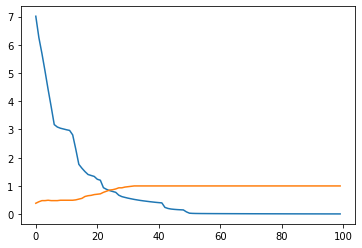

val loss


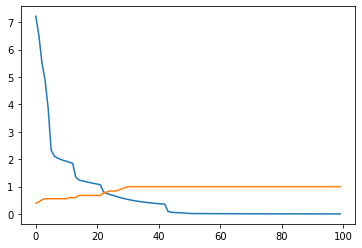

In [265]:
import seaborn as sns
import matplotlib.pyplot as plt
# loss
print('train loss')
sns.lineplot(data = history.history['loss'])
sns.lineplot(data = history.history['accuracy'])

plt.show()
print('val loss')
sns.lineplot(data = history.history['val_loss'])
sns.lineplot(data = history.history['val_accuracy'])
plt.show()

# Problem 2
Learn Iris (multi-level classification) with Keras

In [266]:
# standardization
from sklearn.preprocessing import StandardScaler
import pandas as pd
scaler = StandardScaler()
processed_x = scaler.fit_transform(features_data.to_numpy())
# print('before trans')
# print(binary_x.describe())
# print('after scale')
# print(pd.DataFrame(processed_bin_x).describe())

# onehot encode
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
processed_y = enc.fit_transform(target_data.to_numpy().reshape(-1,1)).toarray()
# print('before trans')
# print(pd.DataFrame(binary_y).describe())
# print('after scale')
# print(pd.DataFrame(processed_bin_y).describe())
# processed_y[0]

In [274]:
# train test split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train,y_test = train_test_split(processed_x, processed_y)
print([x.shape for x in [x_train, x_test, y_train,y_test]])
print(x_train[0])
print(y_train[0])

[(112, 4), (38, 4), (112, 3), (38, 3)]
[-0.90068117  0.55861082 -1.16971425 -0.92054774]
[1. 0. 0.]


In [275]:
# model
model = keras.Sequential()

# layers
from tensorflow.keras import layers

model.add(layers.Dense(20, activation="relu", name="layer1"))
model.add(layers.Dense(10, activation="relu", name="layer2"))
model.add(layers.Dense(3, name="layer3"))


model.layers

In [276]:
model.build(x_train.shape)
model.summary()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Dense)               (112, 20)                 100       
_________________________________________________________________
layer2 (Dense)               (112, 10)                 210       
_________________________________________________________________
layer3 (Dense)               (112, 3)                  33        
Total params: 343
Trainable params: 343
Non-trainable params: 0
_________________________________________________________________


In [277]:
# loss
loss = 'categorical_crossentropy'
# compile
model.compile(optimizer, loss, metrics = metrics)

In [271]:
history = model.fit(x_train, y_train,
                    batch_size=10,
                    epochs=100,
                    verbose=1,
                    validation_data= (x_test, y_test))


Epoch 1/100
12/12 [==============================] - 0s 15ms/step - loss: 3.3230 - accuracy: 0.4554 - val_loss: 4.3627 - val_accuracy: 0.6053
Epoch 2/100
12/12 [==============================] - 0s 3ms/step - loss: 2.8745 - accuracy: 0.5625 - val_loss: 3.1164 - val_accuracy: 0.6579
Epoch 3/100
12/12 [==============================] - 0s 3ms/step - loss: 3.2485 - accuracy: 0.6071 - val_loss: 2.6554 - val_accuracy: 0.6579
Epoch 4/100
12/12 [==============================] - 0s 2ms/step - loss: 3.0627 - accuracy: 0.6339 - val_loss: 3.0654 - val_accuracy: 0.6579
Epoch 5/100
12/12 [==============================] - 0s 2ms/step - loss: 3.1900 - accuracy: 0.6339 - val_loss: 3.9159 - val_accuracy: 0.6579
Epoch 6/100
12/12 [==============================] - 0s 2ms/step - loss: 3.1703 - accuracy: 0.6429 - val_loss: 3.5394 - val_accuracy: 0.6579
Epoch 7/100
12/12 [==============================] - 0s 2ms/step - loss: 3.3100 - accuracy: 0.6429 - val_loss: 3.8675 - val_accuracy: 0.6579
Epoch 8/100


train loss


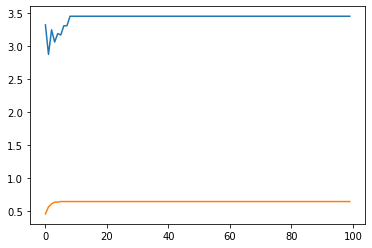

val loss


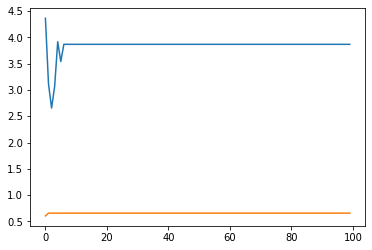

In [272]:
import seaborn as sns
import matplotlib.pyplot as plt
# loss
print('train loss')
sns.lineplot(data = history.history['loss'])
sns.lineplot(data = history.history['accuracy'])

plt.show()
print('val loss')
sns.lineplot(data = history.history['val_loss'])
sns.lineplot(data = history.history['val_accuracy'])
plt.show()

# Problem 5
Learning House Prices with Keras

In [278]:
# data set
house_price_pd = pd.read_csv('../Data/Normal/houseprice_train.csv')
house_price_pd.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [279]:
# selection
selected = house_price_pd[['GrLivArea', 'YearBuilt','SalePrice']]
print('selected: ', selected.shape, selected.columns)
print(selected.head())

selected:  (1460, 3) Index(['GrLivArea', 'YearBuilt', 'SalePrice'], dtype='object')
   GrLivArea  YearBuilt  SalePrice
0       1710       2003     208500
1       1262       1976     181500
2       1786       2001     223500
3       1717       1915     140000
4       2198       2000     250000


In [280]:
# check nan
print(selected.isna().sum(axis = 0))

GrLivArea    0
YearBuilt    0
SalePrice    0
dtype: int64


In [281]:
# normalize
print(selected.describe().transpose()[['mean', 'std']])

import numpy as np
from sklearn.preprocessing import FunctionTransformer
transformer = FunctionTransformer(np.log1p, validate=True)
scaled = transformer.fit_transform(selected)
print(pd.DataFrame(scaled).describe().transpose()[['mean', 'std']])

explainatory = scaled[:,:-1]
objective = scaled[:,-1].reshape(-1,1)
print(explainatory.shape, explainatory[:3])
print(objective.shape, objective[:3])

                    mean           std
GrLivArea    1515.463699    525.480383
YearBuilt    1971.267808     30.202904
SalePrice  180921.195890  79442.502883
        mean       std
0   7.268512  0.333303
1   7.586821  0.015389
2  12.024057  0.399449
(1460, 2) [[7.44483327 7.60290046]
 [7.14124512 7.58933582]
 [7.48829352 7.60190196]]
(1460, 1) [[12.24769912]
 [12.10901644]
 [12.31717117]]


In [282]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(explainatory, objective, train_size = 0.8)
print('train shape: ', [i.shape for i in [X_train, X_val, y_train, y_val]])

train shape:  [(1168, 2), (292, 2), (1168, 1), (292, 1)]


In [283]:
# linear regression model
model = keras.Sequential(
  [
    layers.Dense(1)
  ]
)

model.build(X_train.shape)
model.summary()

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (1168, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [290]:
model.compile(
    optimizer='adam',
    loss='mean_absolute_error')

In [291]:
history = model.fit(X_train, y_train,
                    batch_size=10,
                    epochs=100,
                    verbose=1,
                    validation_data= (X_val, y_val))


Epoch 1/100
117/117 [==============================] - 0s 1ms/step - loss: 0.1966 - val_loss: 0.2062
Epoch 2/100
117/117 [==============================] - 0s 798us/step - loss: 0.1963 - val_loss: 0.2070
Epoch 3/100
117/117 [==============================] - 0s 853us/step - loss: 0.1965 - val_loss: 0.2076
Epoch 4/100
117/117 [==============================] - 0s 992us/step - loss: 0.1961 - val_loss: 0.2082
Epoch 5/100
117/117 [==============================] - 0s 1ms/step - loss: 0.1965 - val_loss: 0.2069
Epoch 6/100
117/117 [==============================] - 0s 899us/step - loss: 0.1988 - val_loss: 0.2075
Epoch 7/100
117/117 [==============================] - 0s 944us/step - loss: 0.1968 - val_loss: 0.2067
Epoch 8/100
117/117 [==============================] - 0s 1ms/step - loss: 0.1961 - val_loss: 0.2103
Epoch 9/100
117/117 [==============================] - 0s 1ms/step - loss: 0.1971 - val_loss: 0.2062
Epoch 10/100
117/117 [==============================] - 0s 1ms/step - loss: 0.197

train loss


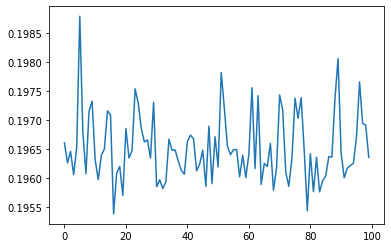

val loss


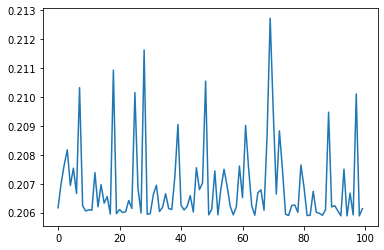

In [292]:
import seaborn as sns
import matplotlib.pyplot as plt
# loss
print('train loss')
sns.lineplot(data = history.history['loss'])

plt.show()
print('val loss')
sns.lineplot(data = history.history['val_loss'])
plt.show()

# Problem 6
Learning MNIST with Keras

# Problem 7
Rewrite to pytorch

## NOTE:
**Let's just implement the MINIST Problem to see the difference**

# Problem 8
(Advance assignment) Comparison of frameworks